In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("E:\\PROJECTS\\Datasets\\archive\\US_Accidents_March23.csv")

In [3]:
ds.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
ds.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [6]:
print(ds.columns.tolist())

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


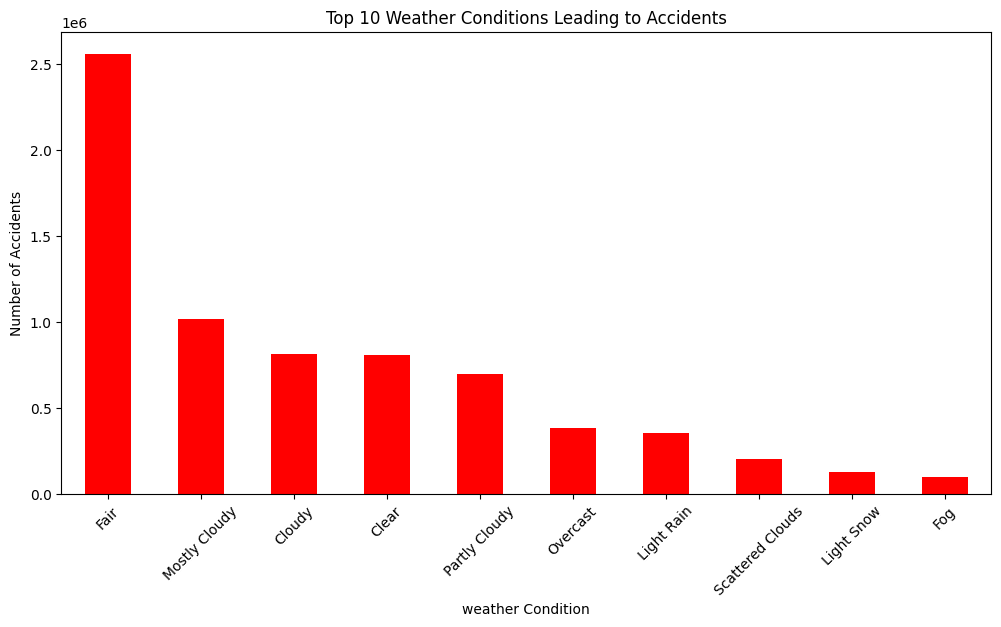

In [7]:
road_conditions=ds.groupby("Weather_Condition")['ID'].count().sort_values(ascending=False)
plt. figure(figsize=(12,6))
road_conditions [:10].plot(kind='bar', color='red')
plt.title("Top 10 Weather Conditions Leading to Accidents") 
plt.xlabel("weather Condition")
plt.ylabel ("Number of Accidents") 
plt.xticks(rotation=45)
plt.show()

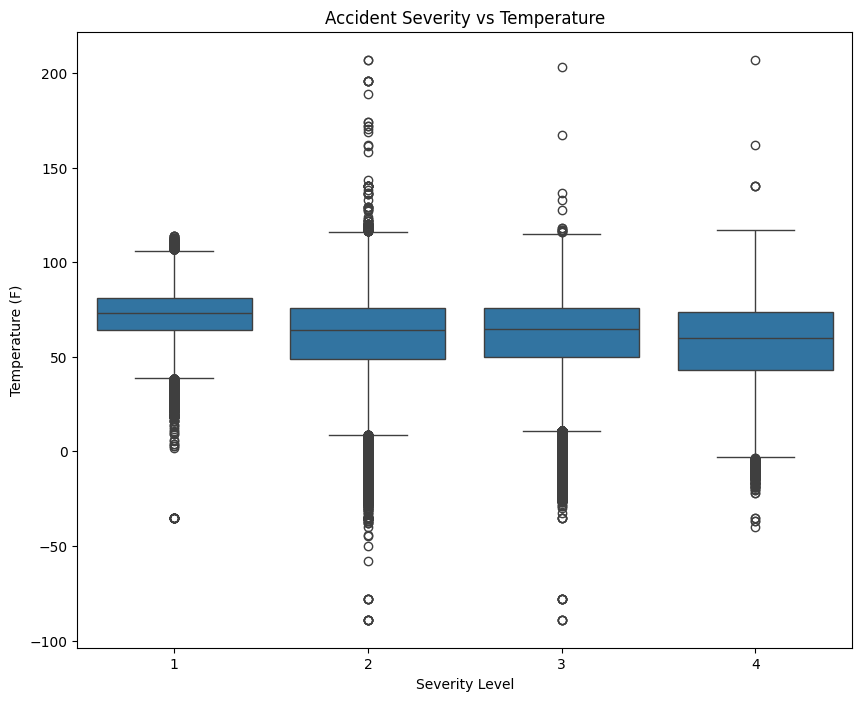

In [8]:
plt. figure(figsize=(10, 8))
sns.boxplot(x= 'Severity', y='Temperature(F)',data=ds)
plt.title("Accident Severity vs Temperature")
plt.xlabel ("Severity Level")
plt.ylabel("Temperature (F)")
plt.show()

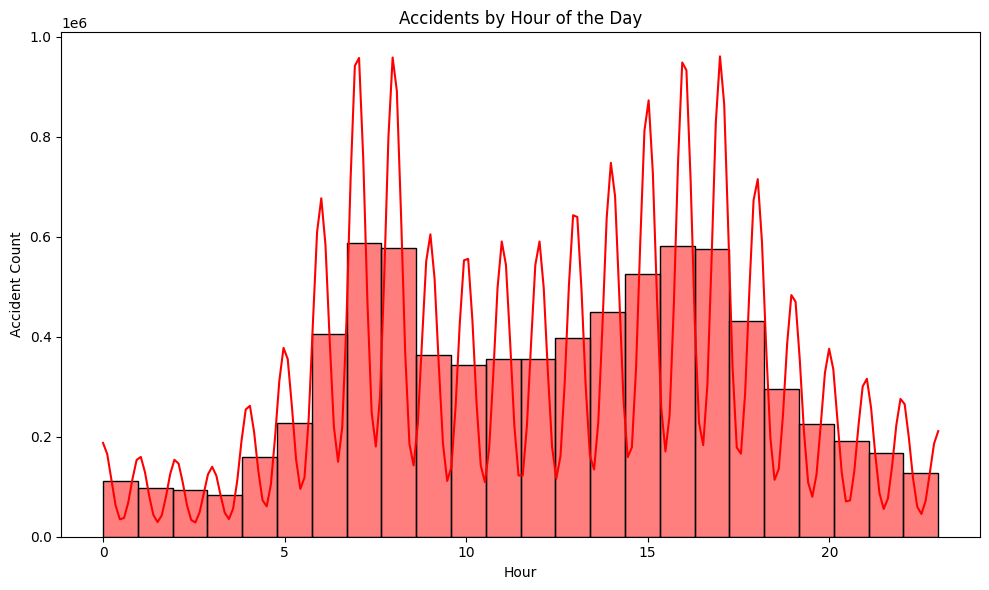

In [15]:
ds['Hour'] = pd.to_datetime(ds['Start_Time'], format='mixed', errors='coerce').dt.hour
plt.figure(figsize=(10,6))
sns.histplot(ds['Hour'],bins=24,kde=True,color='red')
plt.title("Accidents by Hour of the Day") 
plt.xlabel ("Hour")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()

In [10]:
tc=ds['City'].value_counts().head(10)

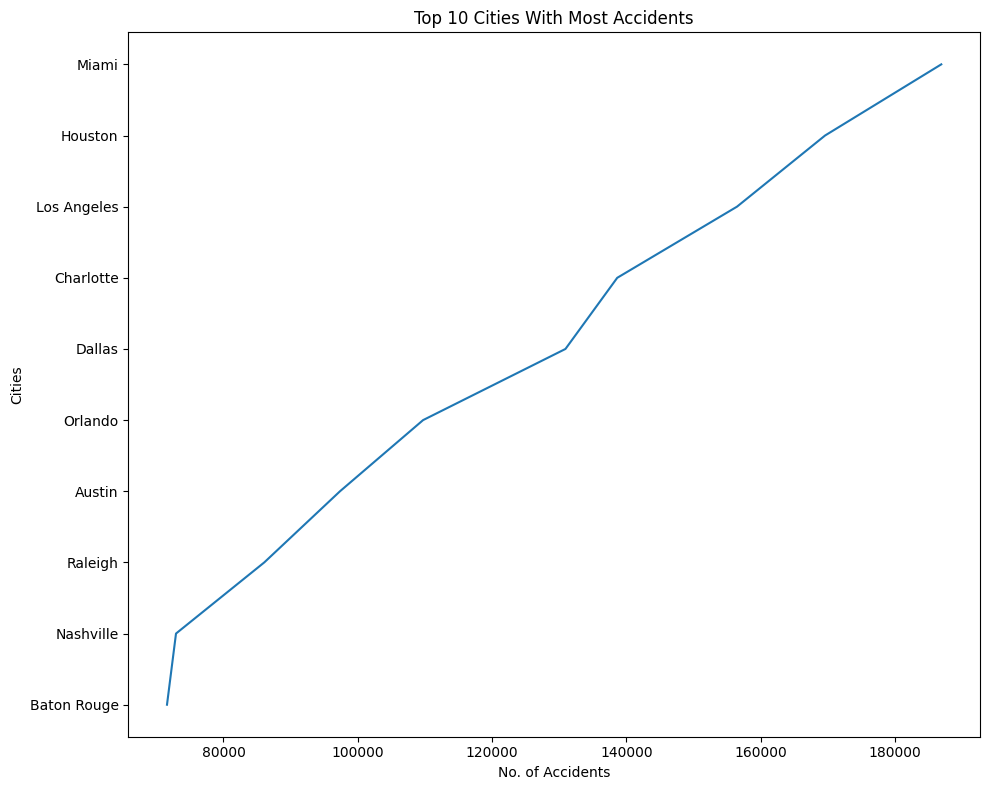

In [11]:
plt.figure(figsize=(10,8))
sns.lineplot(x=tc.values,y=tc.index)
plt.title("Top 10 Cities With Most Accidents")
plt.xlabel("No. of Accidents")
plt.ylabel("Cities")
plt.tight_layout()
plt.show()

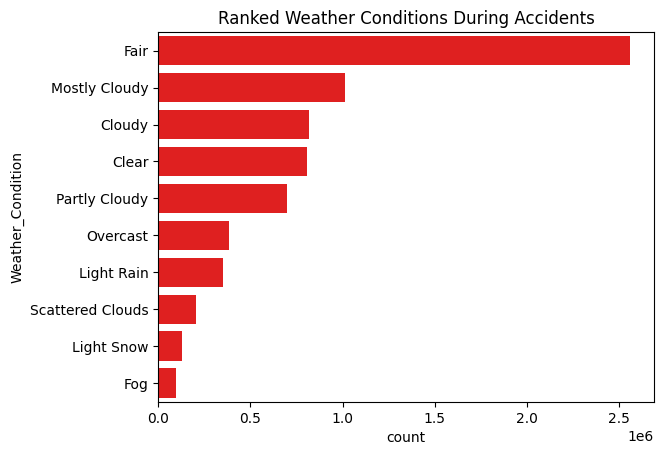

In [16]:
sns.countplot(y='Weather_Condition',data=ds,order=ds['Weather_Condition'].value_counts().head(10).index,color='red')
plt.title("Ranked Weather Conditions During Accidents")
plt.show()